Mean Squared Error: 0.01
R-squared: 1.00


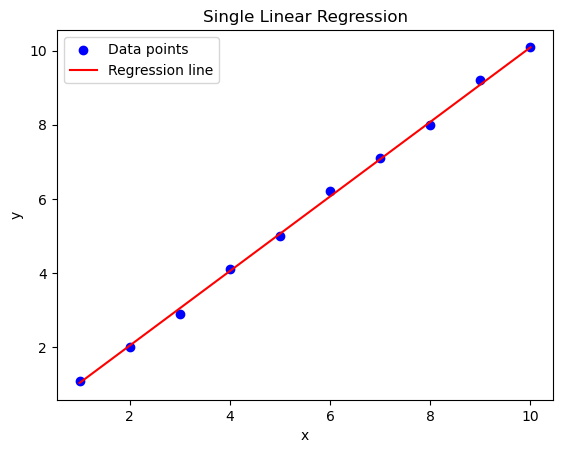

In [1]:
#Single Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1.1, 2.0, 2.9, 4.1, 5.0, 6.2, 7.1, 8.0, 9.2, 10.1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single Linear Regression')
plt.legend()
plt.show()


Mean Squared Error: 1.72
R-squared: 0.99
Coefficients: [1.96307012 0.68754255 1.96307012]
Intercept: -5.141592920353993


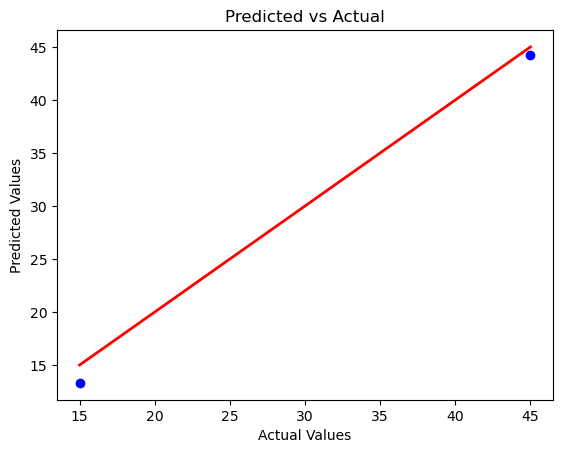

In [2]:
#Multiple Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 1, 3, 5, 7, 8, 6, 9, 11],
    'Feature3': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Target': [10, 15, 14, 20, 25, 30, 35, 40, 45, 50]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()


Iteration 0, Cost: 22.0000
Iteration 100, Cost: 0.0172
Iteration 200, Cost: 0.0122
Iteration 300, Cost: 0.0087
Iteration 400, Cost: 0.0062
Iteration 500, Cost: 0.0044
Iteration 600, Cost: 0.0032
Iteration 700, Cost: 0.0023
Iteration 800, Cost: 0.0016
Iteration 900, Cost: 0.0011
Final parameters: [0.09475322 1.97375488]


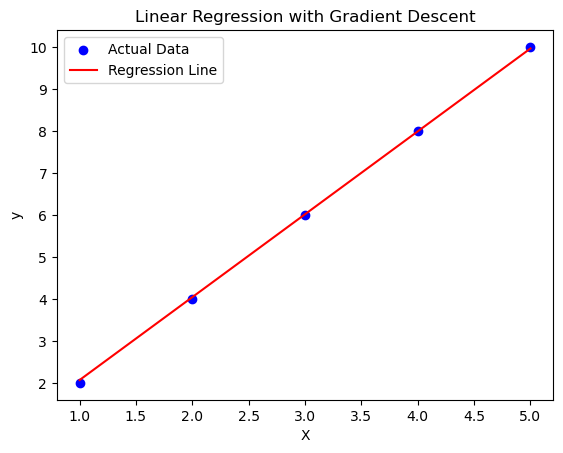

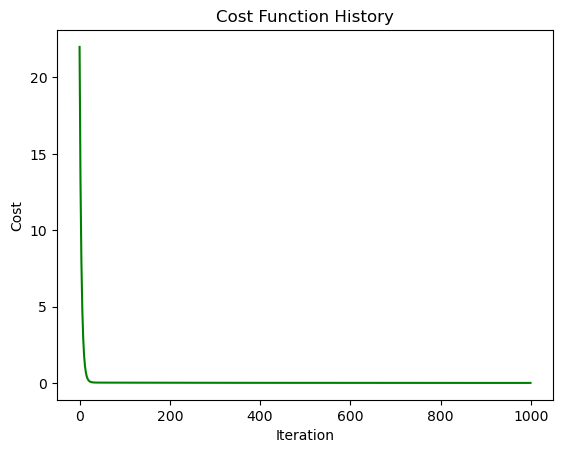

In [3]:
#Gradient Decent
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5]) 
y = np.array([2, 4, 6, 8, 10])  

X = X.reshape(-1, 1)
X = np.c_[np.ones(X.shape[0]), X]  

theta = np.zeros(X.shape[1]) 
learning_rate = 0.01
num_iterations = 1000

m = len(y) 
cost_history = []

for i in range(num_iterations):
    predictions = X.dot(theta)
    
    error = predictions - y
    gradient = (1/m) * X.T.dot(error)
    theta -= learning_rate * gradient
    
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

print(f"Final parameters: {theta}")

y_pred = X.dot(theta)

plt.scatter(X[:, 1], y, color='blue', label='Actual Data')
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

